# Graph regularization for terrorist relationships using natural graphs

On data 
*Terrorists are linked to each other if they contact each other, use the same facility, are members of the same family, or belong to the same terrorist organization.*

This notebook is closely inspired by this [Tensorflow](https://www.tensorflow.org/neural_structured_learning/tutorials/graph_keras_mlp_cora) notebook demonstrating the functionality of neural structures learning.

### Preprocessing data

In [30]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.expand_frame_repr', False)

In [ ]:
family = pd.read_csv('data/TerroristRel/TerroristRel_Family.nodes', header = None, delim_whitespace = True, engine='python')
colleague = pd.read_csv('data/TerroristRel/TerroristRel_Colleague.nodes', header = None, delim_whitespace = True, engine='python')
congregate = pd.read_csv('data/TerroristRel/TerroristRel_Congregate.nodes', header = None, delim_whitespace = True, engine='python')
contact = pd.read_csv('data/TerroristRel/TerroristRel_Contact.nodes', header = None, delim_whitespace = True, engine='python')

In [ ]:
new_df = pd.concat([family, colleague, congregate, contact], ignore_index=True)

In [31]:
# removing non-values from the dataset..
new_df = new_df[new_df[1225] != 'non-congregate']
new_df = new_df[new_df[1225] != 'non-family']
new_df = new_df[new_df[1225] != 'non-contact']
new_df = new_df[new_df[1225] != 'non-colleague']
new_df.head()

NameError: name 'new_df' is not defined

In [ ]:
new_df[1225].value_counts()

In [ ]:
# make sure that the data is shuffeled
new_df = new_df.sample(frac=1)

In [ ]:
new_df.to_csv('data/CustomTerroristRel/collected.nodes', sep="\t", header = False,index=False)

## Setup



1.  Select TensorFlow 2.x to create an interactive development environment with eager execution.
2.  Install the Neural Structured Learning package.

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  !pip install tensorflow-gpu>=2.0.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu


In [3]:
!pip install --quiet neural-structured-learning

## Dependencies and imports

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import neural_structured_learning as nsl

import tensorflow as tf

## Terror Relationsship dataset

The [Terror Relationship dataset](https://linqs.soe.ucsc.edu/data) is a graph created terrorist relationship between each other. 
Nodes represent terrorist and edges represent a relationship between two terrorists. Trough this notebook we will try to solve the classification problem of categorizing the relationship between terrorists in on of 4 categories. 



### Graph

The graph is undirected as this makes sense :) 


### Features

* The dataset contains 1224 distinct biniarized features indicated by 0/1 values. 0 indicated that a features is not present while 1 indicates that a features i present.

* Each feature vector has a url as a specific id, and a label as the last postion classifying the relationship

### Download the terrorist relations dataset

In [49]:
!tar -C /tmp -xvzf /Users/johanweisshansen/Desktop/nsl-master/dataset_test_1/data/CustomTerroristRel.tgz

x CustomTerroristRel/
x CustomTerroristRel/TerroristRel_Family.nodes
x CustomTerroristRel/TerroristRel_Colleague.nodes
x CustomTerroristRel/TerroristRel_Contact.nodes
x CustomTerroristRel/.DS_Store
x CustomTerroristRel/collected.nodes
x CustomTerroristRel/README
x CustomTerroristRel/TerroristRel.labels
x CustomTerroristRel/TerroristRel_Congregate.nodes
x CustomTerroristRel/TerroristRel.edges


### Convert the Cora data to the NSL format

In order to preprocess the Terrorist Relations dataset and convert it to the format required by
Neural Structured Learning, we will run the **'preprocess_cora_dataset.py'**
script, which is included in the NSL github repository. This script does the
following:

1.  Generate neighbor features using the original node features and the graph.
2.  Generate train and test data splits containing `tf.train.Example` instances.
3.  Persist the resulting train and test data in the `TFRecord` format.

In [50]:
!python preprocessing_terror_dataset_test.py \
--input_cora_content=/tmp/CustomTerroristRel/collected.nodes \
--input_cora_graph=/tmp/CustomTerroristRel/TerroristRel.edges \
--max_nbrs=3 \
--train_percentage=0.2\
--output_train_data=/tmp/CustomTerroristRel/train_merged_examples.tfr \
--output_test_data=/tmp/CustomTerroristRel/test_examples.tfr


preprocessing_terror_dataset_test.py:138: DeprecationWarning: 'U' mode is deprecated
  with open(in_file, 'rU') as cora_content:
Reading graph file: /tmp/CustomTerroristRel/TerroristRel.edges...
Done reading 8592 edges from: /tmp/CustomTerroristRel/TerroristRel.edges (0.02 seconds).
Making all edges bi-directional...
Done (0.01 seconds). Total graph nodes: 881
Joining seed and neighbor tf.train.Examples with graph edges...
W1127 12:49:36.979162 4458966464 preprocessing_terror_dataset_test.py:191] No tf.train.Example found for edge target ID: "http://counterterror.mindswap.org/2005/terrorists.owl#Richard_Colvin_Reid_http://profilesinterror.mindswap.org/document/2005/09/07/09:36:59#"
W1127 12:49:36.979267 4458966464 preprocessing_terror_dataset_test.py:191] No tf.train.Example found for edge target ID: "http://counterterror.mindswap.org/2005/terrorists.owl#Nizar_Trabelsi_http://counterterror.mindswap.org/2005/terrorists.owl#Richard_Colvin_Reid"
W1127 12:49:36.983722 4458966464 preprocess

W1127 12:49:37.061996 4458966464 preprocessing_terror_dataset_test.py:191] No tf.train.Example found for edge target ID: "http://profilesinterror.mindswap.org/document/27#FarouqQaddoumi_http://profilesinterror.mindswap.org/document/2005/05/24/18:26:22#Khaled_al-Fahoum"
W1127 12:49:37.062648 4458966464 preprocessing_terror_dataset_test.py:191] No tf.train.Example found for edge target ID: "http://profilesinterror.mindswap.org/document/19#MohammedSalameh_http://profilesinterror.mindswap.org/document/19#AhmadAjaj"
W1127 12:49:37.062724 4458966464 preprocessing_terror_dataset_test.py:191] No tf.train.Example found for edge target ID: "http://profilesinterror.mindswap.org/document/19#MohammedSalameh_http://profilesinterror.mindswap.org/document/19#Nidal_Ayyad"
W1127 12:49:37.062776 4458966464 preprocessing_terror_dataset_test.py:191] No tf.train.Example found for edge target ID: "http://profilesinterror.mindswap.org/document/19#MohammedSalameh_http://profilesinterror.mindswap.org/document/1

## Global variables

The file paths to the train and test data are based on the command line flag
values used to invoke the **'preprocess_cora_dataset.py'** script above.

In [34]:
### Experiment dataset
TRAIN_DATA_PATH = '/tmp/CustomTerroristRel/train_merged_examples.tfr'
TEST_DATA_PATH = '/tmp/CustomTerroristRel/test_examples.tfr'

### Constants used to identify neighbor features in the input.
NBR_FEATURE_PREFIX = 'NL_nbr_'
NBR_WEIGHT_SUFFIX = '_weight'

## Hyperparameters

We will use an instance of `HParams` to inclue various hyperparameters and
constants used for training and evaluation. We briefly describe each of them
below:

-   **num_classes**: There are a total 7 different classes

-   **max_seq_length**: This is the size of the vocabulary and all instances in
    the input have a dense multi-hot, bag-of-words representation. In other
    words, a value of 1 for a word indicates that the word is present in the
    input and a value of 0 indicates that it is not.

-   **distance_type**: This is the distance metric used to regularize the sample
    with its neighbors.

-   **graph_regularization_multiplier**: This controls the relative weight of
    the graph regularization term in the overall loss function.

-   **num_neighbors**: The number of neighbors used for graph regularization.
    This value has to be less than or equal to the `max_nbrs` command-line
    argument used above when running `preprocess_cora_dataset.py`.

-   **num_fc_units**: The number of fully connected layers in our neural
    network.

-   **train_epochs**: The number of training epochs.

-   **batch_size**: Batch size used for training and evaluation.

-   **dropout_rate**: Controls the rate of dropout following each fully
    connected layer

-   **eval_steps**: The number of batches to process before deeming evaluation
    is complete. If set to `None`, all instances in the test set are evaluated.

In [35]:
class HParams(object):
  """Hyperparameters used for training."""
  def __init__(self):
    ### dataset parameters
    self.num_classes = 4
    self.max_seq_length = 1224 # distinct features
    ### neural graph learning parameters
    self.distance_type = nsl.configs.DistanceType.L2
    self.graph_regularization_multiplier = 0.1
    self.num_neighbors = 1
    ### model architecture
    self.num_fc_units = [50,50]
    ### training parameters
    self.train_epochs = 150
    self.batch_size = 150
    self.dropout_rate = 0.5
    ### eval parameters
    self.eval_steps = None  # All instances in the test set are evaluated.

HPARAMS = HParams()

## Load train and test data

As described earlier in this notebook, the input training and test data have
been created by the **'preprocess_cora_dataset.py'**. We will load them into two
`tf.data.Dataset` objects -- one for train and one for test.

In the input layer of our model, we will extract not just the 'words' and the
'label' features from each sample, but also corresponding neighbor features
based on the `hparams.num_neighbors`. Instances with fewer neighbors than
`hparams.num_neighbors` will be assigned dummy values for those non-existent
neighbor features.

In [36]:
def parse_example(example_proto):
  """Extracts relevant fields from the `example_proto`.

  Args:
    example_proto: An instance of `tf.train.Example`.

  Returns:
    A pair whose first value is a dictionary containing relevant features
    and whose second value contains the ground truth labels.
  """
  # The 'words' feature is a multi-hot, bag-of-words representation of the
  # original raw text. A default value is required for examples that don't
  # have the feature.
  feature_spec = {
      'words':
          tf.io.FixedLenFeature([HPARAMS.max_seq_length],
                                tf.int64,
                                default_value=tf.constant(
                                    0,
                                    dtype=tf.int64,
                                    shape=[HPARAMS.max_seq_length])),
      'label':
          tf.io.FixedLenFeature((), tf.int64, default_value=-1),
  }
  # We also extract corresponding neighbor features in a similar manner to
  # the features above.
  for i in range(HPARAMS.num_neighbors):
    nbr_feature_key = '{}{}_{}'.format(NBR_FEATURE_PREFIX, i, 'words')
    nbr_weight_key = '{}{}{}'.format(NBR_FEATURE_PREFIX, i, NBR_WEIGHT_SUFFIX)
    feature_spec[nbr_feature_key] = tf.io.FixedLenFeature(
        [HPARAMS.max_seq_length],
        tf.int64,
        default_value=tf.constant(
            0, dtype=tf.int64, shape=[HPARAMS.max_seq_length]))

    # We assign a default value of 0.0 for the neighbor weight so that
    # graph regularization is done on samples based on their exact number
    # of neighbors. In other words, non-existent neighbors are discounted.
    feature_spec[nbr_weight_key] = tf.io.FixedLenFeature(
        [1], tf.float32, default_value=tf.constant([0.0]))

  features = tf.io.parse_single_example(example_proto, feature_spec)

  labels = features.pop('label')
  return features, labels


def make_dataset(file_path, training=False):
  """Creates a `tf.data.TFRecordDataset`.

  Args:
    file_path: Name of the file in the `.tfrecord` format containing
      `tf.train.Example` objects.
    training: Boolean indicating if we are in training mode.

  Returns:
    An instance of `tf.data.TFRecordDataset` containing the `tf.train.Example`
    objects.
  """
  dataset = tf.data.TFRecordDataset([file_path])
  if training:
    dataset = dataset.shuffle(10000)
  dataset = dataset.map(parse_example)
  dataset = dataset.batch(HPARAMS.batch_size)
  return dataset


train_dataset = make_dataset(TRAIN_DATA_PATH, training=True)
test_dataset = make_dataset(TEST_DATA_PATH)

## Model definition

We use a simple functional model in keras as basemodel for our predictions.

something about the model:
* layers
* neurons ..
* why we do it this way..

### Functional base model

In [37]:
def make_mlp_functional_model(hparams):
    """Creates a functional API-based multi-layer perceptron model."""
    inputs = tf.keras.Input(shape=(hparams.max_seq_length,), dtype='int64', name='words')

  # Input is already one-hot encoded in the integer format. We cast it to
  # floating point format here.
    cur_layer = tf.keras.layers.Lambda(
      lambda x: tf.keras.backend.cast(x, tf.float32))(
          inputs)

    for num_units in hparams.num_fc_units:
        cur_layer = tf.keras.layers.Dense(num_units, activation='relu')(cur_layer)
        # For functional models, by default, Keras ensures that the 'dropout' layer
        # is invoked only during training.
        cur_layer = tf.keras.layers.Dropout(hparams.dropout_rate)(cur_layer)
        cur_layer = tf.keras.layers.BatchNormalization()(cur_layer)

    outputs = tf.keras.layers.Dense(
      hparams.num_classes, activation='softmax')(
          cur_layer)

    model = tf.keras.Model(inputs, outputs=outputs)
    return model

## Create base model(s)

In [38]:
# Create a base MLP model using the functional API.
base_model_tag, base_model = 'FUNCTIONAL', make_mlp_functional_model(HPARAMS)
base_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
words (InputLayer)           [(None, 1224)]            0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 1224)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                61250     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 50)                200       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0   

## Train base (Multilayer perceptron) MLP model

In [39]:
# Compile and train the base MLP model
base_model.compile(
    optimizer='adam',
    #sparse_categorical_crossentropy
    #categorical_crossentropy
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    lr=0.01, clipnorm=1.)
base_model_history = base_model.fit(train_dataset, epochs=HPARAMS.train_epochs, verbose=1, validation_data=test_dataset) 

Epoch 1/150
2/2 [==============================] - 1s 481ms/step - loss: 2.2343 - accuracy: 0.2716 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 57ms/step - loss: 1.7989 - accuracy: 0.3457 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 54ms/step - loss: 1.9690 - accuracy: 0.2593 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 56ms/step - loss: 1.5472 - accuracy: 0.3086 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 56ms/step - loss: 1.8232 - accuracy: 0.3272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 52ms/step - loss: 1.6707 - accuracy: 0.3333 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 60ms/step - loss: 1.8857 - accuracy: 0.3272 - val_loss: 0

2/2 [==============================] - 0s 60ms/step - loss: 0.6207 - accuracy: 0.7469 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 57/150
2/2 [==============================] - 0s 61ms/step - loss: 0.6320 - accuracy: 0.7778 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 58/150
2/2 [==============================] - 0s 61ms/step - loss: 0.6954 - accuracy: 0.8025 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 59/150
2/2 [==============================] - 0s 60ms/step - loss: 0.8577 - accuracy: 0.7531 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 60/150
2/2 [==============================] - 0s 57ms/step - loss: 0.7491 - accuracy: 0.7840 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 61/150
2/2 [==============================] - 0s 54ms/step - loss: 0.5989 - accuracy: 0.7654 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 62/150
2/2 [==============================] - 0s 55ms/step - loss: 0.7073 - accuracy: 0.7346 - val_loss: 0.0000e+

Epoch 111/150
2/2 [==============================] - 0s 50ms/step - loss: 0.5224 - accuracy: 0.8580 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 112/150
2/2 [==============================] - 0s 50ms/step - loss: 0.3377 - accuracy: 0.8765 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 113/150
2/2 [==============================] - 0s 55ms/step - loss: 0.7799 - accuracy: 0.8457 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 114/150
2/2 [==============================] - 0s 62ms/step - loss: 0.3867 - accuracy: 0.8642 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 115/150
2/2 [==============================] - 0s 56ms/step - loss: 0.3385 - accuracy: 0.8704 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 116/150
2/2 [==============================] - 0s 57ms/step - loss: 0.4266 - accuracy: 0.8580 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 117/150
2/2 [==============================] - 0s 50ms/step - loss: 0.4437 - accuracy: 0.8642 

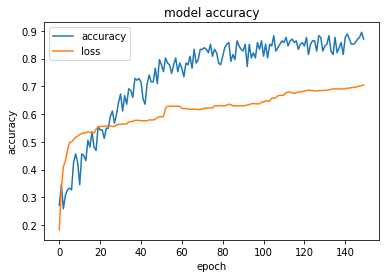

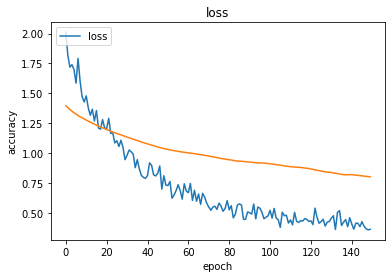

In [40]:
# base_model.history.history['accuracy']


# summarize history for accuracy
plt.plot(base_model_history.history['accuracy'])
plt.plot(base_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

plt.plot(base_model.history.history['loss'])
plt.plot(base_model_history.history['val_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

## Evaluate base MLP model

In [41]:
# Helper function to print evaluation metrics.
def print_metrics(model_desc, eval_metrics):
  """Prints evaluation metrics.

  Args:
    model_desc: A description of the model.
    eval_metrics: A dictionary mapping metric names to corresponding values. It
      must contain the loss and accuracy metrics.
  """
  print('\n')
  print('Eval accuracy for ', model_desc, ': ', eval_metrics['accuracy'])
  print('Eval loss for ', model_desc, ': ', eval_metrics['loss'])
  if 'graph_loss' in eval_metrics:
    print('Eval graph loss for ', model_desc, ': ', eval_metrics['graph_loss'])

In [42]:
eval_results = dict(
    zip(base_model.metrics_names,
        base_model.evaluate(test_dataset, steps=HPARAMS.eval_steps)))
print_metrics('Base MLP model', eval_results)

5/5 [==============================] - 0s 12ms/step - loss: 0.8007 - accuracy: 0.7054


Eval accuracy for  Base MLP model :  0.7053701
Eval loss for  Base MLP model :  0.8007137775421143


## Train MLP model with graph regularization

Incorporating graph regularization into the loss term of an existing
`tf.Keras.Model` requires just a few lines of code. The base model is wrapped to
create a new `tf.Keras` subclass model, whose loss includes graph
regularization.

To assess the incremental benefit of graph regularization, we will create a new
base model instance. This is because `base_model` has already been trained for a
few iterations, and reusing this trained model to create a graph-regularized
model will not be a fair comparison for `base_model`.

In [43]:
# Build a new base MLP model.
base_reg_model_tag, base_reg_model = 'FUNCTIONAL', make_mlp_functional_model(
    HPARAMS)

In [44]:
# Wrap the base MLP model with graph regularization.
graph_reg_config = nsl.configs.make_graph_reg_config(
    max_neighbors=HPARAMS.num_neighbors,
    multiplier=HPARAMS.graph_regularization_multiplier,
    distance_type=HPARAMS.distance_type,
    sum_over_axis=-1)

graph_reg_model = nsl.keras.GraphRegularization(base_reg_model,
                                                graph_reg_config)
graph_reg_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
graph_reg_model_history = graph_reg_model.fit(train_dataset, epochs=HPARAMS.train_epochs, verbose=1, validation_data=test_dataset)

Epoch 1/150


/Users/johanweisshansen/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/johanweisshansen/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


2/2 [==============================] - 3s 2s/step - loss: 1.9027 - accuracy: 0.2778 - graph_loss: 0.2123 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 55ms/step - loss: 1.5063 - accuracy: 0.2654 - graph_loss: 0.3168 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 57ms/step - loss: 2.0448 - accuracy: 0.3086 - graph_loss: 0.2836 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 59ms/step - loss: 1.7648 - accuracy: 0.2593 - graph_loss: 0.3288 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 58ms/step - loss: 1.6973 - accuracy: 0.3457 - graph_loss: 0.4264 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 6/150
2/2 [=======

2/2 [==============================] - 0s 63ms/step - loss: 0.8749 - accuracy: 0.6914 - graph_loss: 0.2571 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 43/150
2/2 [==============================] - 0s 61ms/step - loss: 1.2163 - accuracy: 0.6296 - graph_loss: 0.2831 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 44/150
2/2 [==============================] - 0s 57ms/step - loss: 1.1317 - accuracy: 0.6605 - graph_loss: 0.2124 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 45/150
2/2 [==============================] - 0s 60ms/step - loss: 0.7447 - accuracy: 0.6914 - graph_loss: 0.2919 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 46/150
2/2 [==============================] - 0s 64ms/step - loss: 0.7846 - accuracy: 0.6790 - graph_loss: 0.2612 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 47/150
2/2 [

2/2 [==============================] - 0s 53ms/step - loss: 1.0410 - accuracy: 0.7716 - graph_loss: 0.3461 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 84/150
2/2 [==============================] - 0s 54ms/step - loss: 0.7917 - accuracy: 0.8148 - graph_loss: 0.2034 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 85/150
2/2 [==============================] - 0s 55ms/step - loss: 0.7619 - accuracy: 0.8457 - graph_loss: 0.2297 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 86/150
2/2 [==============================] - 0s 54ms/step - loss: 0.6851 - accuracy: 0.7778 - graph_loss: 0.2186 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 87/150
2/2 [==============================] - 0s 57ms/step - loss: 0.9481 - accuracy: 0.7840 - graph_loss: 0.3212 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 88/150
2/2 [

2/2 [==============================] - 0s 53ms/step - loss: 0.5570 - accuracy: 0.8395 - graph_loss: 0.2624 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 125/150
2/2 [==============================] - 0s 54ms/step - loss: 0.6512 - accuracy: 0.8395 - graph_loss: 0.1596 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 126/150
2/2 [==============================] - 0s 56ms/step - loss: 0.4693 - accuracy: 0.8148 - graph_loss: 0.2045 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 127/150
2/2 [==============================] - 0s 56ms/step - loss: 0.4903 - accuracy: 0.8519 - graph_loss: 0.1776 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 128/150
2/2 [==============================] - 0s 54ms/step - loss: 0.5714 - accuracy: 0.8580 - graph_loss: 0.2210 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 129/150


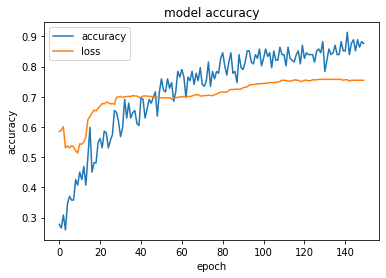

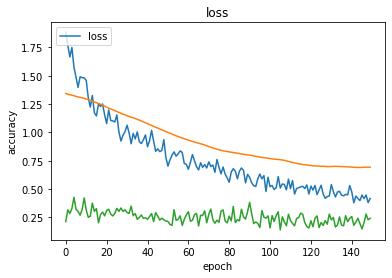

In [46]:
# base_model.history.history['accuracy']

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(graph_reg_model_history.history['accuracy'])
plt.plot(graph_reg_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

plt.plot(graph_reg_model.history.history['loss'])
plt.plot(graph_reg_model.history.history['val_loss'])
plt.plot(graph_reg_model.history.history['graph_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

## Evaluate MLP model with graph regularization

In [47]:
eval_results = dict(
    zip(graph_reg_model.metrics_names,
        graph_reg_model.evaluate(test_dataset, steps=HPARAMS.eval_steps)))
print_metrics('MLP + graph regularization', eval_results)

5/5 [==============================] - 0s 13ms/step - loss: 0.6924 - accuracy: 0.7547 - graph_loss: 0.0000e+00


Eval accuracy for  MLP + graph regularization :  0.754717
Eval loss for  MLP + graph regularization :  0.6923710107803345
Eval graph loss for  MLP + graph regularization :  0.0


The graph-regularized model's accuracy is about 2-3% higher than that of the
base model (`base_model`).

## Conclusion

We have demonstrated the use of graph regularization for document classification
on a natural citation graph (Cora) using the Neural Structured Learning (NSL)
framework. Our [advanced tutorial](graph_keras_lstm_imdb.ipynb) involves
synthesizing graphs based on sample embeddings before training a neural network
with graph regularization. This approach is useful if the input does not contain
an explicit graph.

We encourage users to experiment further by varying the amount of supervision as
well as trying different neural architectures for graph regularization.

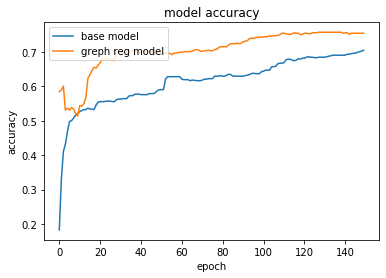

In [48]:
# base_model.history.history['accuracy']
# base_model.history.history['accuracy']

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(base_model_history.history['val_accuracy'])
plt.plot(graph_reg_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['base model', 'greph reg model'], loc='upper left')
plt.show()